## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Read AB test data
df=pd.read_csv('ab_data.csv')
#Show dataframe head
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#Show no. of rows in a dataframe
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
#Show number of unique user_id
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
#Show proportion of converted users
str(df['converted'].mean()*100)+"%"

'11.9659193556%'

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#Show number of lines where group and landing_page are missmatched for treatment group
df.query("group=='treatment' and landing_page=='old_page'").shape[0]

1965

In [7]:
#Show number of lines where group and landing_page are missmatched for control group
df.query("group=='control' and landing_page=='new_page'").shape[0]

1928

f. Do any of the rows have missing values?

In [8]:
#Show number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


No null values in the table.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Eliminate lines where there is a mismatch between group and landing page
df.drop(df.query("group=='treatment' and landing_page=='old_page'").index, inplace=True)
df.drop(df.query("group=='control' and landing_page=='new_page'").index, inplace=True)
df2=df

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
#Show number of unique user_id
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#Show lines with duplicated user_id
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
#Show lines with duplicated user_id
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#Drop one of the lines with duplicated user_id
df2.drop(df2.query("user_id==773192 and timestamp=='2017-01-14 02:55:59.590927'").index, inplace=True)
df2.shape[0]

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
#Show average conversion rate for entire sample
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
#Show statistics based on groups
df2.groupby('group').describe()

converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145274.0  0.120386  0.325414  0.0  0.0  0.0  0.0  1.0  145274.0   
treatment  145310.0  0.118808  0.323564  0.0  0.0  0.0  0.0  1.0  145310.0   

                                                                       \
                    mean           std       min        25%       50%   
group                                                                   
control    788164.072594  91287.914601  630002.0  709279.50  788128.5   
treatment  787845.719290  91161.564429  630000.0  708745.75  787876.0   

                                
                 75%       max  
group                           
control    867208.25  945998.0  
treatment  866718.75  945999.0

0.120386 is the probability for conversion within the control group


c. Given that an individual was in the `treatment` group, what is the probability they converted?

0.118808 is the probability for conversion within the treatment group

d. What is the probability that an individual received the new page?

In [17]:
#Compute probablity of new page
df2.query("group == 'treatment'").shape[0]/df2.shape[0]

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

There is only a very small difference between the conversion rate of the control group (average conversion rate of 0.120386) and the treatment group (average conversion rate of 0.118808) that would suggest the control group has a higher conversion rate. 
However, there can be numerous other variables that influence the conversion rate so that we can not draw any conclusion from this information. Other variables can include speed of internet (page loading),time duration of page testing.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H0:pOld_page>=pNew_page    ;
H1:POld_page<pNew_page


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
#Compute probability of conversion
pNew_page = df2[df2['landing_page']=='new_page']['converted'].mean()
pOld_page=df2[df2['landing_page']=='old_page']['converted'].mean()

#Probability of conversion udner null hypothesis
pNull =np.mean([pNew_page, pOld_page])
pNull


0.11959718500778342

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
pNull

0.11959718500778342

c. What is $n_{new}$?

In [20]:
#Compute number of treatment visitors
nNew_page=df2.query("group=='treatment'").shape[0]
nNew_page

145310

d. What is $n_{old}$?

In [21]:
#Compute number of control visitors
nOld_page=df2.query("group=='control'").shape[0]
nOld_page

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
#Generate array of 1 and 0 of size nNew_page and p pNull
new_page_converted=np.random.choice([1,0],size=nNew_page,p=(pNull,1-pNull))
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
#Generate array of 1 and 0 of size nOld_page and p pNull
old_page_converted=np.random.choice([1,0],size=nOld_page,p=(pNull,1-pNull))
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
#Compute difference in the two arrays generated
pDiffOldNew=pNew_page-pOld_page
pDiffOldNew

-0.0015782389853555567

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [25]:
#Create empty array for differences between simulations
p_diffs = []

#Append differences between probabilities for 10,000 simulations to array
for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=nNew_page, p=[pNull, (1-pNull)]).mean()
    old_page_converted = np.random.choice([1, 0], size=nOld_page, p=[pNull, (1-pNull)]).mean()
    diff = new_page_converted - old_page_converted 
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

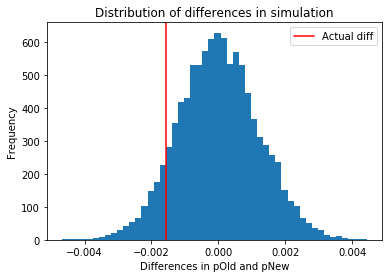

In [26]:
plt.hist(p_diffs,bins=50)

plt.title('Distribution of differences in simulation')
plt.xlabel('Differences in pOld and pNew')
plt.ylabel('Frequency')
plt.axvline(x=(pNew_page-pOld_page), color='r', label="Actual diff")
plt.legend()


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
#Compute actual difference between probabilities of treatment versus control
act_diffs=df2.query("group=='treatment'")['converted'].mean()-df2.query("group=='control'")['converted'].mean()

#Make np.array out of probability differences
p_diffs = np.array(p_diffs)

#Compute p value
(act_diffs < p_diffs).mean()


0.91010000000000002

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Given the resulting p-value greater than the p-critical value of 0.05, we fail to reject the null. In other words, we fail to reject that the new page generates better conversion rates than the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))
convert_old, n_old, convert_new, n_new


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 145274, 17264, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
import statsmodels.api as sm
from scipy.stats import norm
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])

z_score, p_value

(1.3109241984234394, 0.18988337448195103)

In [30]:
norm.cdf(z_score), norm.ppf(1-(0.05))

(0.90505831275902449, 1.6448536269514722)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

z_score (0.9050) is smaller than p_value critical (1.6448), thus we fail to reject the null.
The conclusion is the same as that resulting in (j) and (k).

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

This is a Logistic regression with the hypotheses to be tested:
H0: pOld_page=pNew_page    ;
H1: pOld_page!=pNew_page   ;

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
df2['intercept']=1
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
import statsmodels.api as sm
logreg = sm.Logit(df2['converted'],df2[['intercept','treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
results = logreg.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 02 Jun 2018   Pseudo R-squ.:               8.077e-06
Time:                        08:59:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

Adding an intercept to the modelling generated a p-value of 0.190, very similar to that previously obtained of 0.18988 and still too high to reject the null hypothesis.This test is a two-tailed test (with the alternative hypothesis being H1: pNew_page!=pOld_page), unlike in the previous exercise (Part II) where we had a one tailed test.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Other things that might influence coneversion rate:
* Timing of testing (holiday season might differ in customer behavior from non-holiday season)
* Duration of testing (short testing results might not be representative)
* Age, sex, location of testing participants (structure of website visitors should be tracked as for example women might be more inclinded to respond to specific changes)
Other variables that influence conversion rates should be taken into account into the regression model. The downside is finding the balance between effort and effect in including these factors as we might consider too many (some that end up not coounting in the results) or too little (missing out on the real important ones).

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [34]:
#Read countries file and assign the values to dataframe
countries_df = pd.read_csv('./countries.csv')

df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [35]:
#Check possible value for visitors' countries
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [36]:
### Create the necessary dummy variables
df_new[['US', 'UK']] = pd.get_dummies(df_new['country'])[['US','UK']]

In [37]:
### Fit Your Linear Model And Obtain the Results
df['intercept'] = 1

logistic = sm.Logit(df_new['converted'], df_new[['intercept','US', 'UK']])
results = logistic.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 02 Jun 2018   Pseudo R-squ.:               1.521e-05
Time:                        08:59:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions
This AB testing was about establishing if a new web page design/format would generate better conversion rates than the old version of the page.
The testing was completed on 294,478 users, half of them receiving the new page (treatment).
The overall conversion rate for the sample was 11.95%, with a very small difference between the Old page users (12.04%) and the New page users (11.88%).
The actual difference between probabilties was compared to the simulated distribution of 10,000 differences and was found not statistically different. This means that that the New page conversion rates were not statistically different from those of the Old page.
Though adding variables such as the country was expected to give us more insight on rejecting the null hypothesis, it appears that they don't make a difference.